In [65]:
import pandas as pd
import seaborn as sns
import datetime
import os
import matplotlib.pyplot as plt

In [66]:
DIRECTORY_PATH = "D:\\.Homework\\CS579\\Research\\our_work\\data"
os.chdir(DIRECTORY_PATH)
LINE_WEIGHT = 0.7

In [67]:
site_differences = pd.read_csv("different_sites_per_psl.csv", header=None, names=['name', 'differences'])
site_counts = pd.read_csv("number_of_sites_per_psl.csv", header=None, names=['date','name','count'])
suffix_counts = pd.read_csv("suffix_count_stats.csv", header=0, index_col=0)
list_hashes = pd.read_csv("psl_list_hashes.csv", header=0, index_col = 0)
severity = pd.read_csv("severity_per_psl.csv", header=None, names=['name', 'severity'])
repo_severity = pd.read_csv("proc_repo_stats.csv", header=0, names=['repo_name', 'psl_version', 'stars', 'forks', 'usage', 'severity'])
sites_by_suffix = pd.DataFrame([suffix_counts['total'], site_counts['count']]).transpose()
dataframes = [site_differences, site_counts, suffix_counts, list_hashes, severity]

In [68]:
display(repo_severity)

,repo_name,psl_version,stars,forks,usage,severity
1,1Password_passkey-rs.dat,1726103475_public_suffix_list.dat,133.0,17.0,static,0.000083
2,aboutcode-org_python-publicsuffix2.dat,1578342945_public_suffix_list.dat,30.0,15.0,dynamic,0.124651
3,addr-rs_addr.dat,1615497398_public_suffix_list.dat,51.0,12.0,static,0.115545
4,AdguardTeam_AdguardForiOS.dat,1633717553_public_suffix_list.dat,1455.0,203.0,static,0.109538
5,adoptium_jdk.dat,1715098327_public_suffix_list.dat,155.0,23.0,static,0.016792
...,...,...,...,...,...,...
149,win-acme_win-acme.dat,1707792923_public_suffix_list.dat,818.0,5304.0,dynamic,0.017651
150,XOOPS_XoopsCore25.dat,1719580503_public_suffix_list.dat,71.0,59.0,static,0.003064
152,yasserg_crawler4j.dat,1538584495_public_suffix_list.dat,4563.0,1926.0,dynamic,0.153624
155,YunaiV_openjdk.dat,1527128766_public_suffix_list.dat,154.0,228.0,static,0.153633


In [69]:
site_counts['date'] = pd.to_datetime(site_counts['date'])
site_differences['date'] = site_counts['date']
suffix_counts['date'] = pd.to_datetime(suffix_counts['date'])
list_hashes['date'] = site_counts['date']
severity['date'] = site_counts['date']


In [70]:
suffix_counts.set_index('date', inplace=True)

<Figure size 640x480 with 0 Axes>

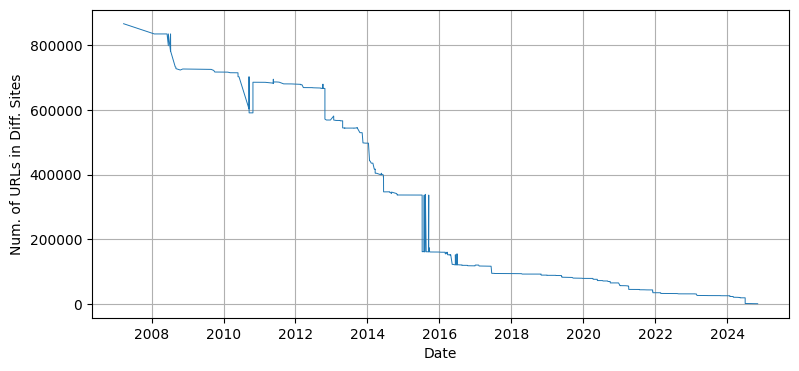

In [71]:
plt.figure()
fig, ax = plt.subplots(figsize=(9, 4))
diff_plot = sns.lineplot(data=site_differences, x='date', y='differences', lw=LINE_WEIGHT)
plt.grid()
diff_plot.set(xlabel='Date', ylabel='Num. of URLs in Diff. Sites')
plt.savefig("diff_plot.png")
plt.show()

<Figure size 640x480 with 0 Axes>

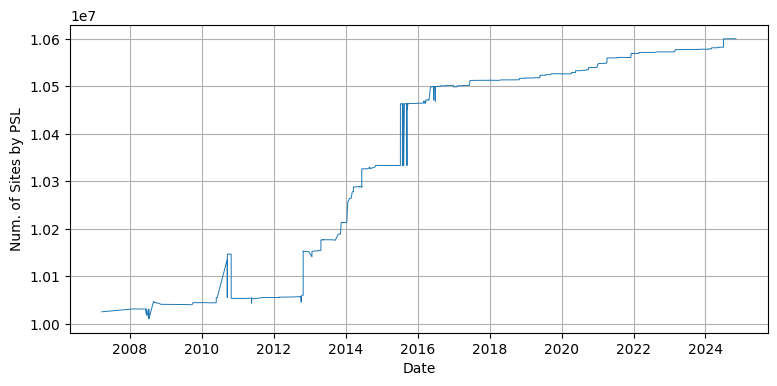

In [72]:
plt.figure()
fig, ax = plt.subplots(figsize=(9, 4))
counts_plot = sns.lineplot(data=site_counts, x='date',
                         y='count', lw=LINE_WEIGHT)
plt.grid()
counts_plot.set(xlabel='Date', ylabel='Num. of Sites by PSL')
plt.savefig("counts_plot.png")
plt.show()

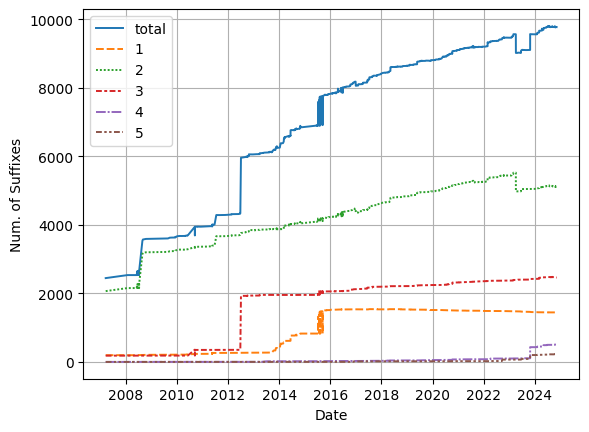

In [73]:
plt.figure()
suffix_plot = sns.lineplot(data=suffix_counts.drop(['7', '6'], axis=1), lw=LINE_WEIGHT*2)
plt.grid()
# sns.lineplot(data=suffix_counts, x='date', y='1', lw=LINE_WEIGHT)
# sns.lineplot(data=suffix_counts, x='date', y='2', lw=LINE_WEIGHT)
# sns.lineplot(data=suffix_counts, x='date', y='3', lw=LINE_WEIGHT)
# sns.lineplot(data=suffix_counts, x='date', y='4', lw=LINE_WEIGHT)
# sns.lineplot(data=suffix_counts, x='date', y='5', lw=LINE_WEIGHT)
# sns.lineplot(data=suffix_counts, x='date', y='6', lw=LINE_WEIGHT)
# sns.lineplot(data=suffix_counts, x='date', y='7', lw=LINE_WEIGHT)
suffix_plot.set(xlabel='Date', ylabel='Num. of Suffixes')
plt.savefig("suffix_plot.png")
plt.show()

<Figure size 640x480 with 0 Axes>

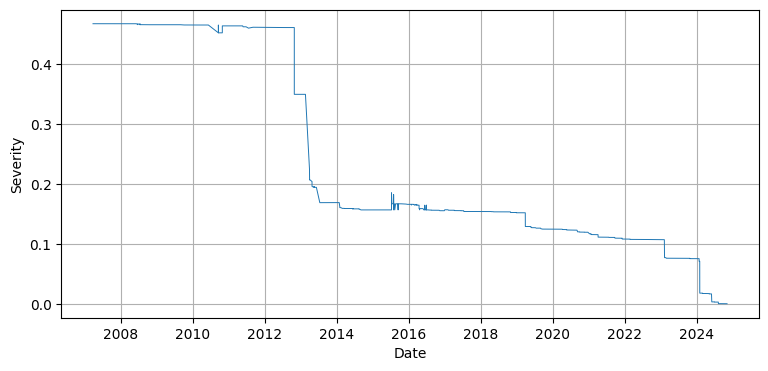

In [74]:
plt.figure()
fig, ax = plt.subplots(figsize=(9, 4))
severity_plot = sns.lineplot(data=severity, x='date',
                           y='severity', lw=LINE_WEIGHT)
plt.grid()
severity_plot.set(xlabel='Date', ylabel='Severity')
plt.savefig("severity_plot.png")
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_8584\3252338889.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  repo_severity_plot = sns.scatterplot(data=repo_severity,


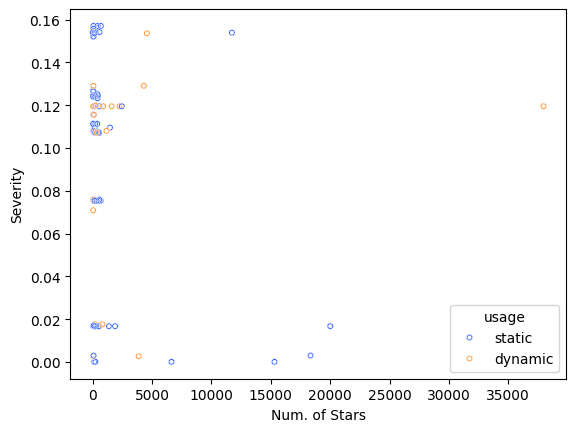

In [75]:
plt.figure()
repo_severity_plot = sns.scatterplot(data=repo_severity, 
                                     x='stars', 
                                     y='severity', 
                                     s=20, hue='usage',
                                     marker="$\circ$", 
                                     palette=sns.color_palette('bright'))
sns.move_legend(repo_severity_plot, "lower right")
repo_severity_plot.set(xlabel='Num. of Stars', ylabel='Severity')
plt.savefig("repo_severity_plot.png")
plt.show()

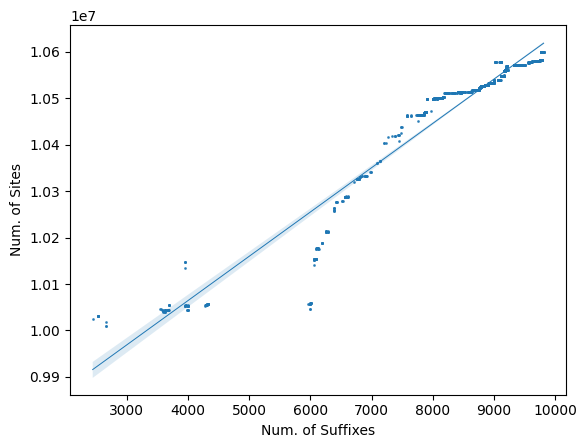

In [91]:
plt.figure()
sites_by_suffix_plot = sns.regplot(data=sites_by_suffix,
                                   x='total',
                                   y='count',
                                   marker="o",
                                   ci = 99,
                                   scatter_kws={'s':1},
                                   line_kws={'lw': LINE_WEIGHT})
sites_by_suffix_plot.set(xlabel="Num. of Suffixes", ylabel="Num. of Sites")
plt.show()

In [92]:
site_differences['differences'].median()

np.float64(78409.0)